# Exploring Scotch Whiskies

In a paper that appeared in 1996, [Pierre Legendre](http://numericalecology.com/) and [F.-J. Lapointe](http://bio.umontreal.ca/repertoire-departement/vue/lapointe-francois-joseph/) performed a classification of pure malt whiskeys. You can find the paper online at http://adn.biol.umontreal.ca/~numericalecology/reprints/Appl%20Stat%2043,%201994.pdf and also some details at http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html.

---
> Georgia Vlassi p2822001<br />
> Business Anlytics <br />
> Athens University of Economics and Business <br/>

---


## Question 1: Score Prediction

Try to find a model to predict the score of schotch a whiskey based on the attributes collected by the authors. You can use any algorithm provided by scikit-learn. Evaluate how well your model performs.


---

Before analyzing our data, we have to import the following packages.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats.stats as stats
import statsmodels.formula.api as smf

The dataset that will be used for our analysis is named `scotch` and contains information about the characteristics of different whiskeys like color, nose, body, palate, and finish. Additionally, a list of geographic coordinates of the distilleries are included.

In [2]:
scotch = pd.read_excel('scotch.xlsx', header=1)
scotch

C:\Users\tzina\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
C:\Users\tzina\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:300: UserWarning: Unknown extension is not supported and will be removed


,NAME,Unnamed: 1,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ardberg,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentoshan,Auchentosh,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Tomintoul,Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,Tormore,Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
108,Tullibardine,Tullibardi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As the column 'NAME' is the same with 'Unnamed: 1', we can remove the latter from our dataset.

In [3]:
scotch = scotch.drop(columns=['Unnamed: 1'])
scotch

,NAME,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
108,Tullibardine,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have to clean our dataset before starting the analysis. The NaNs values should be removed.

In [4]:
#Show the datatypes
scotch.dtypes

NAME         object
wyne        float64
yellow      float64
v.pale      float64
pale        float64
             ...   
west        float64
north       float64
lowland     float64
campbell    float64
islands     float64
Length: 84, dtype: object

In [5]:
#Count the NAs values of each column
scotch.isna().sum()

NAME        2
wyne        1
yellow      1
v.pale      1
pale        1
           ..
west        1
north       1
lowland     1
campbell    1
islands     1
Length: 84, dtype: int64

Observing the data, there are NAs only in the two final rows. So, we will drop them by using tail(2).

In [6]:
scotch.drop(scotch.tail(2).index,inplace=True)
scotch

,NAME,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,MULL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105,Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106,Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Count the NAs values of each column after drop
scotch.isna().sum()

NAME        0
wyne        0
yellow      0
v.pale      0
pale        0
           ..
west        0
north       0
lowland     0
campbell    0
islands     0
Length: 84, dtype: int64

In [8]:
#Rename the column '%'
scotch.rename(columns={'%' : 'percentage'}, inplace=True)
scotch

,NAME,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,MULL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105,Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106,Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


There is a misallignment in 'AGE' column, which should be updated.

In [9]:
scotch['AGE']=scotch['AGE'].replace(-9, 9)
scotch['AGE']

0       9.0
1      12.0
2      10.0
3      18.0
4      10.0
       ... 
104     9.0
105    10.0
106    12.0
107    10.0
108    10.0
Name: AGE, Length: 109, dtype: float64

In order to proceed to different implementations for the prediction, we will create a copy of scotch named `scotch_new`.
We will convert the 'NAME' column to index, so as to use it like address. That's how any data point across the dataframe can be accessed.

In [10]:
scotch_new = scotch.copy()

In [11]:
scotch_new = scotch_new.set_index('NAME')
scotch_new

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,MULL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


As the columns 'DISTRICT' and 'REGION' are analyzed to 'islay', 'midland', 'spey', 'east', 'west', 'north' and so on, with binary values per rows, can be removed.

In [12]:
scotch_new = scotch_new.drop(columns=['REGION','DISTRICT'])
scotch_new

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,percentage,islay,midland,spey,east,west,north,lowland,campbell,islands
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(list(scotch_new.columns))

['wyne', 'yellow', 'v.pale', 'pale', 'p.gold', 'gold', 'o.gold', 'f.gold', 'bronze', 'p.amber', 'amber', 'f.amber', 'red', 'sherry', 'AROMA', 'PEAT', 'SWEET', 'LIGHT', 'FRESH', 'DRY', 'FRUIT', 'GRASS', 'SEA', 'SHERRY', 'SPICY', 'RICH', 'soft', 'med', 'full', 'round', 'smooth', 'light', 'firm', 'oily', 'full.1', 'dry', 'sherry.1', 'big', 'light.1', 'smooth.1', 'clean', 'fruit', 'grass', 'smoke', 'sweet', 'spice', 'oil', 'salt', 'arome', 'full.2', 'dry.1', 'warm', 'big.1', 'light.2', 'smooth.2', 'clean.1', 'fruit.1', 'grass.1', 'smoke.1', 'sweet.1', 'spice.1', 'oil.1', 'salt.1', 'arome.1', 'ling', 'long', 'very', 'quick', 'AGE', 'DIST', 'SCORE', 'percentage', 'islay', 'midland', 'spey', 'east', 'west', 'north ', 'lowland', 'campbell', 'islands']


In [14]:
scotch_new.isna().sum()

wyne        0
yellow      0
v.pale      0
pale        0
p.gold      0
           ..
west        0
north       0
lowland     0
campbell    0
islands     0
Length: 81, dtype: int64

We should import the following packages for the prediction.

In [15]:
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression

The main scope of prediction is to predict the value of a dependent variable based on independent variable(s). 
So, the dependent and independent variables should be set. The 'SCORE' column will be the dependent variable, as our scope is to predict the score of the scotch whiskey based on the attributes.

In [16]:
#Set independent variables
X = scotch_new.loc[:, scotch_new.columns != 'SCORE']
X

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,percentage,islay,midland,spey,east,west,north,lowland,campbell,islands
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Set the dependent variable SCORE
Y = scotch_new['SCORE']
Y

NAME
Aberfeldy       69.0
Aberlour        83.0
Ardberg         85.0
Ardmore         66.0
Auchentoshan    85.0
                ... 
Tobermory       67.0
Tomatin         75.0
Tomintoul       76.0
Tormore         76.0
Tullibardine    76.0
Name: SCORE, Length: 109, dtype: float64

In order to better understand our dependent variable 'SCORE', we can check its distribution by the use of histogram.

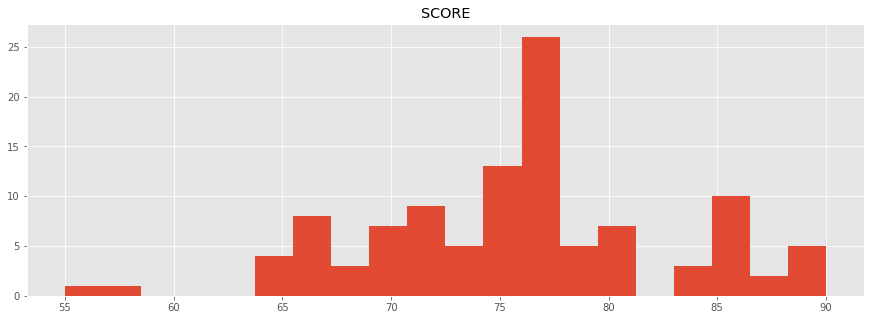

In [18]:
plt.style.use('ggplot')
_ = scotch_new[['SCORE']].hist(bins=20, figsize=(15, 5))

Subsequently, we will split our data to train and test with ratio 80-20. The parameter random_state is used for initializing the internal random number generator and it is optional.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=33)

#Show the shape of each
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(87, 80) (87,)
(22, 80) (22,)


The Stochastic Gradient Descent (SGD) method to the regressor provides the efficient estimator for regression problems.
We will define the regressor model by using the SGDRegressor class. 

In [20]:
iterations=100

sgdr = SGDRegressor(max_iter=iterations)
sgdr = SGDRegressor()
print(sgdr)

SGDRegressor()


* We will check the model accuracy score of the train dataset by the R-squared metric.The R-square metric describes the performance of the model. It describes the variation in the response or target variable 'SCORE', which is predicted by the independent attributes of the data model.

* If R-squared value 0.3 < R < 0.5 is generally considered a weak or low effect size. In our case the model is very weak.

In [21]:
sgdr.fit(X_train, Y_train)

score = sgdr.score(X_train, Y_train)
print("R-squared:", score)

R-squared: -3.486113705219011e+22


* A cross-validation method is applied to the model, in order to check the training accuracy. 

* It takes the attributes and target 'SCORE', splits into k-folds (k = 10 in our case), fits on the (k-1) folds and evaluates on the last fold. It does this k times.

In [22]:
cv_score = cross_val_score(sgdr, X, Y, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  -4.655721314554793e+22


* We will predict the test data by using the trained model. The accuracy of predicted data can be cheched by using MSE and RMSE metrics.

* The Mean Squared Error (MSE) measures the average of error squares i.e. the average squared difference between the estimated values and true value.

In [23]:
Y_pred = sgdr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  1.7018010862653596e+24
RMSE:  8.509005431326798e+23


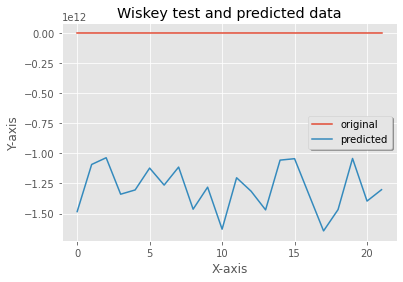

In [24]:
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("Wiskey test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Observing the results, we can conclude that there is a huge deviation between the actual and predicting data.
More specific, all the original values are zero, which is not possible. 
We will proceed in data scaling and rerun the steps for the prediction.

In [25]:
#Scale the independent variables
X = scale(X)

#Scale the dependent variable
Y = scale(Y)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=33)

#Show the shape of each
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(87, 80) (87,)
(22, 80) (22,)


We will check the model accuracy score by the R-squared metric at the new model. From the value, which is close to 1, we can considered of a strong effect size.

In [27]:
sgdr.fit(X_train, Y_train)

score = sgdr.score(X_train, Y_train)
print("R-squared:", score)

R-squared: 0.9504185601783842


A cross-validation method is applied to the model, in order to check the training accuracy of the scaled data.

In [28]:
cv_score = cross_val_score(sgdr, X, Y, cv = 5)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.5278836338062639


* We can redict the 'SCORE' and calculate the MSE and RMSE metrics of the scaled values.
* The ideal MSE is 0, which indicates a model that perfectly predicts the training data, but it is very unlikely to perfectly predict any other data. We want a balance between overfit (very low MSE for training data) and underfit (very high MSE for test/validation/unseen data).

In [29]:
Y_pred = sgdr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.582808413656197
RMSE:  0.2914042068280985


The lower the MSE the better and 0 means that the model is perfect. Since there is no correct answer, the MSE's basic value is in selecting one prediction model over another. In our case, we will choose the second model with the scaled data as better.

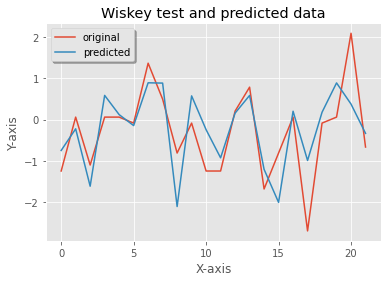

In [30]:
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("Wiskey test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


## Question 2: PCA

Perform a PCA analysis on the data to reduce the number of dimensions.

---

We should import the following packages for the PCA analysis.

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Principal Component Analysis is a dimensionality-reduction method, which is used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

We will start with a copy of the inital dataset, after the implemetations for Question 1 and we will proceed to variables reduction.

In [32]:
scotch_numeric = scotch_new.copy()
scotch_numeric

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,percentage,islay,midland,spey,east,west,north,lowland,campbell,islands
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


The first step of PCA is the standardization of the data. The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

In [33]:
scaler = StandardScaler()
scaler.fit(scotch_numeric)
scotch_scaled = scaler.transform(scotch_numeric)
scotch_scaled

array([[-0.28143902,  7.31436942, -0.13671719, ..., -0.3       ,
        -0.16823165, -0.2192645 ],
       [-0.28143902, -0.13671719, -0.13671719, ..., -0.3       ,
        -0.16823165, -0.2192645 ],
       [-0.28143902, -0.13671719, -0.13671719, ..., -0.3       ,
        -0.16823165, -0.2192645 ],
       ...,
       [-0.28143902, -0.13671719, -0.13671719, ..., -0.3       ,
        -0.16823165, -0.2192645 ],
       [-0.28143902, -0.13671719, -0.13671719, ..., -0.3       ,
        -0.16823165, -0.2192645 ],
       [-0.28143902, -0.13671719, -0.13671719, ..., -0.3       ,
        -0.16823165, -0.2192645 ]])

Initially, we will create an instance of a model including all the variables-components.

In [34]:
pca_initial = PCA(n_components = 81)
pca_initial.fit(scotch_scaled)

PCA(n_components=81)

In [35]:
pca_initial.components_.shape

(81, 81)

From the below we can understand:
* explained_variance_: The amount of variance explained by each of the selected components.
* explained_variance_ratio_: Percentage of variance explained by each of the selected components. As in our case we have the total components the percentage is almost equal to 100%

In [36]:
print(pca_initial.explained_variance_)
print(pca_initial.explained_variance_ratio_.sum())

[4.27033512e+00 3.67423473e+00 3.35275958e+00 3.34555190e+00
 2.77067684e+00 2.68401303e+00 2.51357901e+00 2.38413982e+00
 2.29603455e+00 2.25543714e+00 2.18155034e+00 2.06860685e+00
 2.05178049e+00 1.96200101e+00 1.86891477e+00 1.83144834e+00
 1.74502183e+00 1.67339707e+00 1.64723216e+00 1.58947727e+00
 1.53515195e+00 1.44760918e+00 1.40031476e+00 1.36345987e+00
 1.28555910e+00 1.27641210e+00 1.26532164e+00 1.19357265e+00
 1.13865275e+00 1.10888398e+00 1.07519255e+00 1.04765938e+00
 1.01974657e+00 9.90779660e-01 9.12473086e-01 8.44240632e-01
 8.17996888e-01 8.01423231e-01 7.83722806e-01 7.70489184e-01
 7.22631287e-01 6.70858126e-01 6.49395751e-01 6.21824589e-01
 5.91085960e-01 5.82055268e-01 5.46879398e-01 5.33950913e-01
 4.92279256e-01 4.69691520e-01 4.46327533e-01 4.28087122e-01
 3.91487704e-01 3.67821203e-01 3.63084955e-01 3.32144473e-01
 3.11474977e-01 2.97972597e-01 2.63606604e-01 2.47539329e-01
 2.39591082e-01 2.23442197e-01 1.98703604e-01 1.82625561e-01
 1.63023110e-01 1.553774

In order to find the best number of components, a typical approach is to use these, that their explained varviance is equal to 95%.

In [37]:
#Make an instance of a model with 0.95 variance
pca_reduced = PCA(n_components = 0.95)
pca_reduced.fit(scotch_scaled)
reduced_data = pca_reduced.transform(scotch_scaled)
reduced_data

array([[-0.79913123, -1.31182679,  4.32543816, ..., -0.52186618,
        -0.28082477, -0.54982097],
       [ 1.22303448,  4.48800594, -1.63675357, ...,  0.47221273,
        -0.6559941 ,  1.19264404],
       [ 4.69585138, -1.39671025,  0.58508961, ...,  0.17599653,
         0.16032293, -0.47185959],
       ...,
       [-1.3516503 , -0.72134868, -1.78754047, ...,  0.21156084,
         0.63134898, -0.38960638],
       [ 0.3329487 ,  2.1827465 ,  0.4917013 , ...,  0.26210872,
        -0.2698457 ,  1.12052894],
       [-1.24067226, -0.60422087, -2.51340161, ...,  0.87895174,
        -0.74391526, -0.75141898]])

We can calculate the shape of the components.

In [38]:
pca_reduced.components_.shape

(54, 81)

We can also show the best number of components with a plot.

In [39]:
#pip install pca

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [81] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [54] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


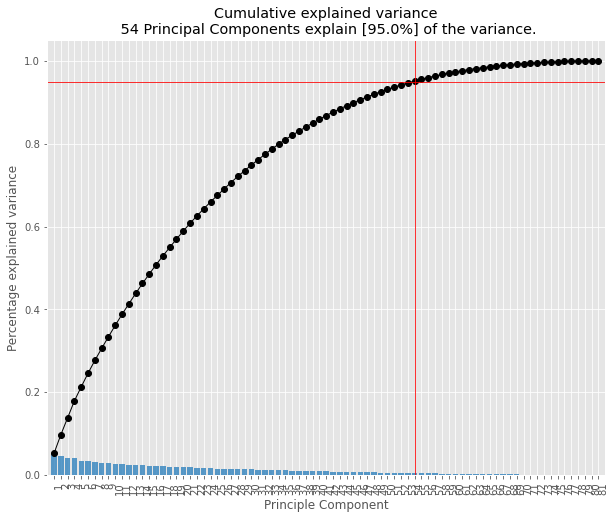

<Figure size 432x288 with 0 Axes>

In [40]:
from pca import pca

#Create a PCA model
pca_model = pca(n_components=0.95)

# Transform the above model with the scaled data
results = pca_model.fit_transform(scotch_scaled)

# Create a plot explained variance
figure, ax = pca_model.plot()

In [41]:
print(pca_reduced.explained_variance_)
print(pca_reduced.explained_variance_ratio_.sum())

[4.27033512 3.67423473 3.35275958 3.3455519  2.77067684 2.68401303
 2.51357901 2.38413982 2.29603455 2.25543714 2.18155034 2.06860685
 2.05178049 1.96200101 1.86891477 1.83144834 1.74502183 1.67339707
 1.64723216 1.58947727 1.53515195 1.44760918 1.40031476 1.36345987
 1.2855591  1.2764121  1.26532164 1.19357265 1.13865275 1.10888398
 1.07519255 1.04765938 1.01974657 0.99077966 0.91247309 0.84424063
 0.81799689 0.80142323 0.78372281 0.77048918 0.72263129 0.67085813
 0.64939575 0.62182459 0.59108596 0.58205527 0.5468794  0.53395091
 0.49227926 0.46969152 0.44632753 0.42808712 0.3914877  0.3678212 ]
0.9511832342205133


* As calculated above, the best number of reduced principal components is 54. 
* With these 54 components the variance explained by each of them is equal to 95%.

A scatter plot is used to show the distribution of these componenets.

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [81] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


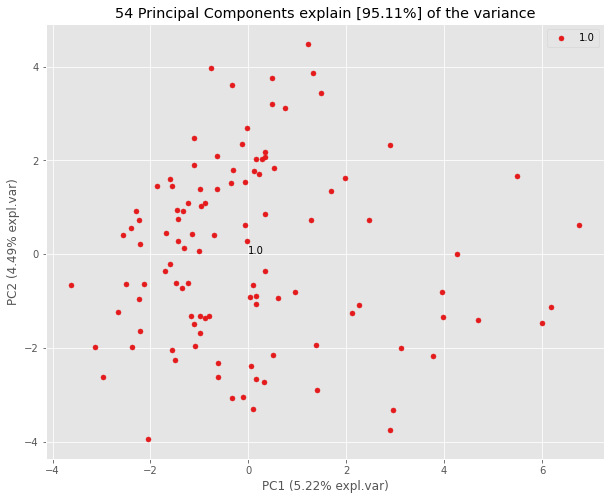

In [42]:
pca_model = pca(n_components=54)

# Fit transform with new components
results_model = pca_model.fit_transform(scotch_scaled)

# Scatter first 2 PCs
figure, ax = pca_model.scatter()

The following biplot() functions from the lecture's notes will be used. A biplot plots the data on the 54 components.

* It displays vectors that show how much each of the original features contributes to each principal component.

* The left and bottom axes of a biplot are the principal components.

* The right and top axes of a biplot show the contributions of the original features to the components.

In [43]:
from math import ceil

# based on https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score, coeff, text, labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, label='pcas')
    ax2 = fig.add_subplot(111, label='loading vectors', frame_on=False)
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()    
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # draw scatterplot
    ax1.scatter(xs, ys, fc='k')
    for i, txt in enumerate(text):
        ax1.text(xs[i] + 0.05, ys[i], txt,
                    fontsize=12,
                    alpha=0.75,
                    c='blue')
        
    # draw loading vectors
    for i in range(n):
        ax2.arrow(0, 0, coeff[i,0] * 0.85, coeff[i,1] * 0.85, 
                  lw=1,
                  color = 'r',alpha = 0.5, head_width=0.025, head_length=0.025)
        if labels is None:
            ax2.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), 
                     color = 'g', ha = 'center', va = 'center')
        else:
            ax2.text(coeff[i,0], coeff[i,1], 
                     labels[i], color = 'brown', ha = 'center', va = 'center',
                     fontsize=14)

    xmax = max(xs.min(), xs.max(), key=abs)
    xlim = 0.5 * ceil(2.0 * xmax)
    ax1.set_xlim(-xlim, xlim)
    ymax = max(ys.min(), ys.max(), key=abs)
    ylim = 0.5 * ceil(2.0 * ymax)
    ax1.set_ylim(-ylim, ylim)
    ax1.axhline(0, linestyle=':', color='k', lw=0.5) # horizontal lines
    ax1.axvline(0, linestyle=':', color='k', lw=0.5) # vertical lines
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax2.set_xlim(-0.4, 0.4)
    ax2.set_ylim(-0.4, 0.4)

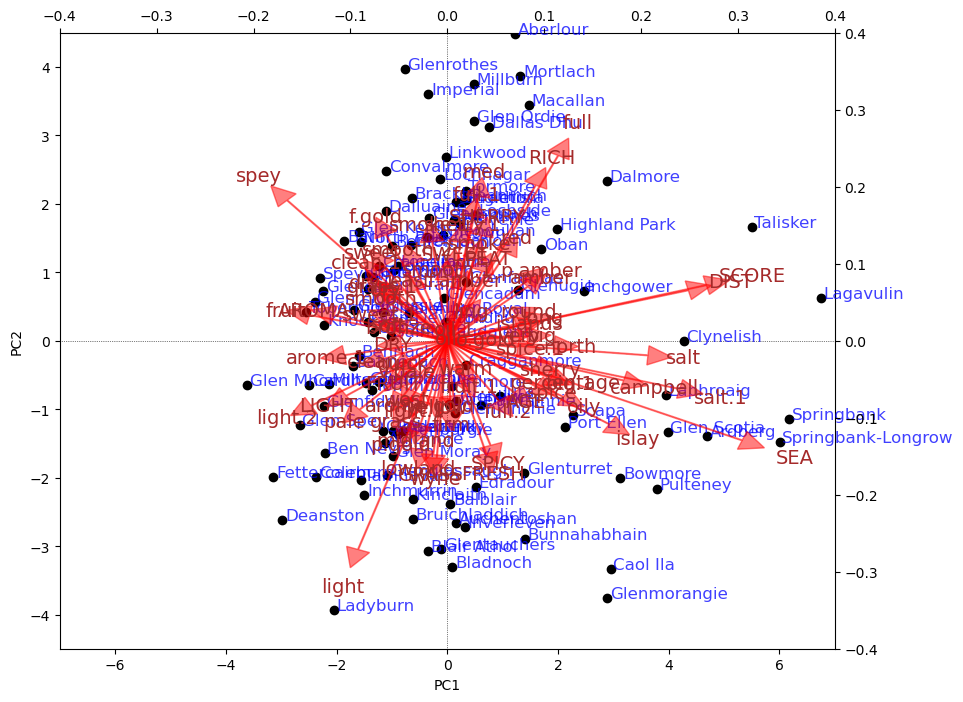

In [44]:
plt.style.use('default')

biplot(reduced_data,
       pca_reduced.components_.T,
       scotch_numeric.index,
       scotch_numeric.columns)

A PCA biplot is a combination of a PCA score plot and a loading plot. 
With the term loading plot we indicate the plot, which shows how strongly each characteristic influences a principal component. 
   * When two vectors are close(the red pointers), forming a small angle, the two variables they represent are positively correlated, like the `SCORE` and the `SEA`. 
   * If they meet each other at 90°, they are not likely to be correlated. For example vectors `FRESH` with `DIST`.
   * When they diverge and form a large angle, which is close to 180°, they are negative correlated. Negative correlated are the vectors `AROMA` with `SCORE`

## Question 3: Clustering without Geographical Information

Carry out clustering on the data, without taking into account the geographical information (regions, districts, geographical coordinates). You can use any [clustering algorithm provided by scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) that you deem suitable. Remember that as we have stressed repeatedly in class, one of the advantages of scikit-learn is that it presents a uniform interface; so if you know how to use it for some cases, you should have no problem using it on new situations. The result should be a number of clusters based on the whiskey characteristics. Describe the groups, list the whiskeys in each group, and the best whiskey of each group, based on its score. You can also check how close your groups are to those found by the authors.

Of course you are free to study and use the [clustering notebook that is available on the course's Google Drive](https://drive.google.com/drive/folders/13R_Q-S4zYJskW4d37Xx6q-23sNAccIqV?usp=sharing).

---

We have to import the following packages to perform clustering.

In [45]:
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

As it's mentioned that the geographical information should not be used in this question, we will create a copy of the initial dataset in Question 1 removing these attributes.

In [46]:
scotch_non_geo = scotch_new.drop(columns=['islay','midland','spey','east','west','north ','lowland','campbell','islands'])
scotch_non_geo

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,salt.1,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,69.0,40.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,12.0,4.0,83.0,43.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,85.0,40.0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18.0,2.0,66.0,46.0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,85.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0,67.0,40.0
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,75.0,40.0
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,12.0,3.0,76.0,40.0


Initially, we have to standardize our data. The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

In [47]:
scaler3 = StandardScaler()
scotch_non_geo_sc = scaler3.fit_transform(scotch_non_geo)
scotch_non_geo_scaled = pd.DataFrame(scotch_non_geo_sc, index=scotch_non_geo.index, 
                             columns=scotch_non_geo.columns)

In order to select the number of the clusters, we will use the silhouette analysis on KMeans clustering. It can be used to study the separation distance between the resulting clusters. 

* The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

* The coefficients that are near to +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. For example, if we choose the second plot with the 3 clusters, we know a priori that the some data will be assigned to a wrong neighboring cluster.


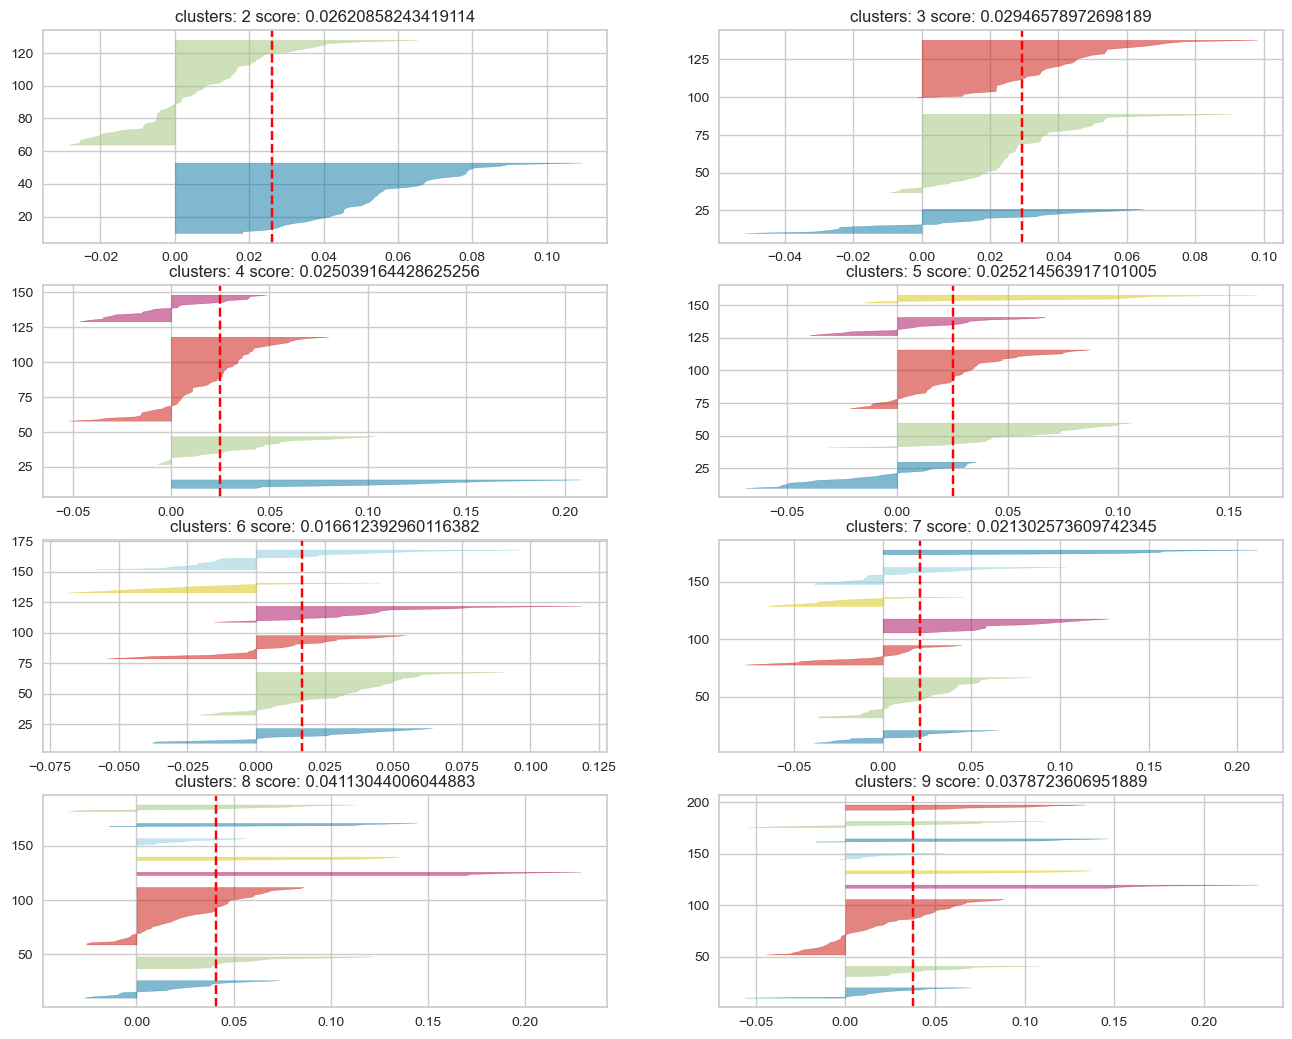

In [48]:
plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
best_kmeans = None
best_score = -1
for n_clusters in range(2, 10):
    plt.subplot(5, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scotch_non_geo_scaled)
    scores[n_clusters] = visualizer.silhouette_score_
    if visualizer.silhouette_score_ > best_score:
        best_score = visualizer.silhouette_score_
        best_kmeans = kmeans
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

We can sort the scores of the above in ascending order.

In [49]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(8, 0.04113044006044883),
 (9, 0.0378723606951889),
 (3, 0.02946578972698189),
 (2, 0.02620858243419114),
 (5, 0.025214563917101005),
 (4, 0.025039164428625256),
 (7, 0.021302573609742345),
 (6, 0.016612392960116382)]

The Elbow method is used to choose the optimal number of clusters. As shown in the plot below the optimal clusters are the 8, which is close to 12 clusters as the authors choose.

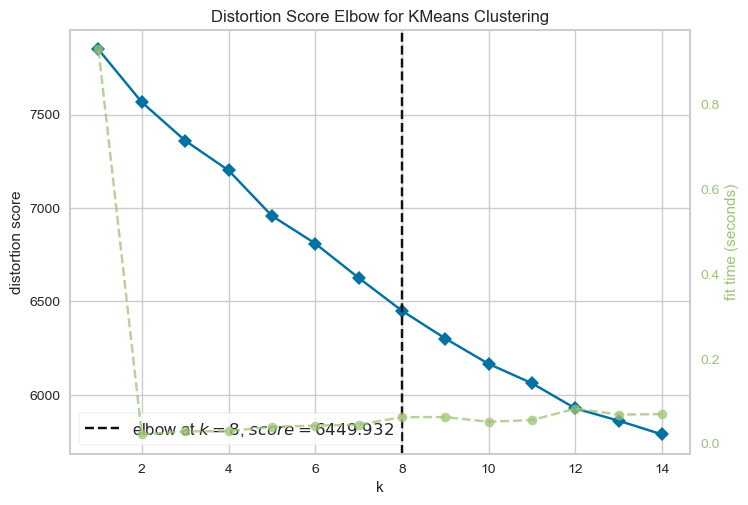

In [50]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,15))

visualizer.fit(scotch_non_geo_scaled)
visualizer.show()

Initially, we run k-means for 8 clusters.

In [51]:
kmeans8 = KMeans(n_clusters=8, random_state=0)

After running the k-means, it should be fitted with our scaled data.

In [52]:
kmeans8.fit(scotch_non_geo_scaled)

KMeans(random_state=0)

We can implement PCA as mentioned in Question 2. We can use PCA with 8 components equal to the selected clusters.

In [53]:
pca8 = PCA(n_components=8)
X8 = pca8.fit_transform(scotch_non_geo_scaled)

The following scatterplot shows the distribution of the points in the different clusters. Taking into consideration what is mentioned above about the silhouette analysis and observing the points, we can understand that the clusters are not discrete and there are points assigned to a wrong neighboring cluster.

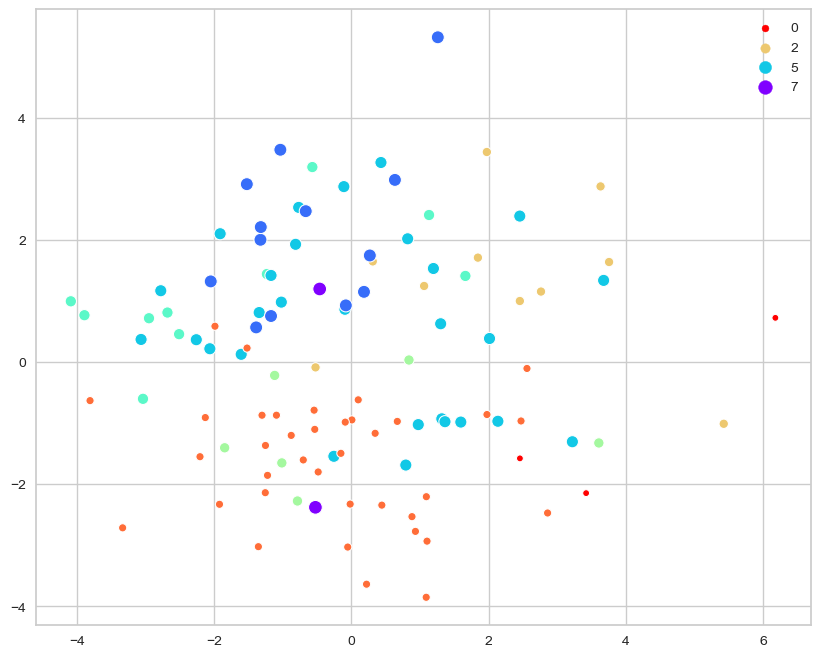

In [54]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X8[:, 0], y=X8[:,1], hue=kmeans8.labels_ , palette="rainbow_r", size=kmeans8.labels_ )

We can compute the clusters by calling the fit_predict() function and predict the cluster index for each.

In [55]:
cluster_pred = kmeans8.fit_predict(scotch_non_geo_scaled)
cluster_pred

array([7, 0, 2, 5, 5, 6, 4, 5, 5, 1, 5, 5, 5, 5, 7, 5, 2, 1, 4, 6, 4, 1,
       4, 5, 5, 1, 6, 1, 1, 1, 3, 2, 4, 1, 6, 4, 1, 6, 5, 1, 6, 1, 5, 1,
       1, 3, 4, 1, 6, 1, 1, 3, 6, 5, 1, 1, 1, 6, 6, 1, 1, 2, 5, 4, 4, 1,
       3, 5, 1, 2, 5, 5, 2, 3, 1, 1, 4, 2, 1, 1, 1, 1, 5, 6, 5, 0, 6, 1,
       1, 5, 5, 2, 5, 1, 5, 5, 3, 2, 2, 5, 0, 1, 5, 1, 1, 1, 5, 1, 6])

The above predictions of the clusters in which each point belongs, can be added to our dataframe.

In [56]:
list_cluster = cluster_pred.tolist()

df_non_geo_clust=scotch_non_geo.copy()

df_non_geo_clust["CLUSTER"] = list_cluster
df_non_geo_clust

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2.0,69.0,40.0,7
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,12.0,4.0,83.0,43.0,0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,4.0,85.0,40.0,2
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,2.0,66.0,46.0,5
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,5.0,85.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.0,2.0,67.0,40.0,1
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,3.0,75.0,40.0,1
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,12.0,3.0,76.0,40.0,5


We want to describe the clusters, to list the whiskeys in each cluster, and the best whiskey of each cluster, based on its score. We will create a new dataframe including only the clusters and the `SCORE` of the each scotch wiskey.

In [57]:
cluster_score = df_non_geo_clust[['SCORE','CLUSTER']]
cluster_score

,SCORE,CLUSTER
NAME,,
Aberfeldy,69.0,7
Aberlour,83.0,0
Ardberg,85.0,2
Ardmore,66.0,5
Auchentoshan,85.0,5
...,...,...
Tobermory,67.0,1
Tomatin,75.0,1
Tomintoul,76.0,5


It is useful to count how many whiskeys includes each cluster.

In [58]:
df_non_geo_clust['CLUSTER'].value_counts()

1    37
5    28
6    13
2    10
4    10
3     6
0     3
7     2
Name: CLUSTER, dtype: int64

We can use the describe() function to view some basic statistical details like percentile, mean, or std of a data frame of numeric values.

In [59]:
desc = cluster_score.groupby(['CLUSTER']).describe().T
desc

CLUSTER         0          1          2          3          4          5  \
SCORE count   3.0  37.000000  10.000000   6.000000  10.000000  28.000000   
      mean   83.0  73.837838  81.700000  74.166667  72.100000  75.107143   
      std     7.0   5.756704   6.650814   7.833688   6.026792   7.738022   
      min    76.0  64.000000  71.000000  64.000000  57.000000  55.000000   
      25%    79.5  70.000000  76.250000  69.500000  71.000000  69.000000   
      50%    83.0  75.000000  83.000000  73.500000  73.500000  76.000000   
      75%    86.5  76.000000  87.250000  78.250000  76.000000  79.000000   
      max    90.0  86.000000  90.000000  86.000000  77.000000  90.000000   

CLUSTER              6          7  
SCORE count  13.000000   2.000000  
      mean   78.307692  77.000000  
      std     4.589565  11.313708  
      min    75.000000  69.000000  
      25%    76.000000  73.000000  
      50%    76.000000  77.000000  
      75%    80.000000  81.000000  
      max    90.000000  85.000000

### Cluster 1

In [60]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 0]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,12.0,4.0,83.0,43.0,0
Millburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,9.0,3.0,76.0,40.0,0
Talisker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,10.0,4.0,90.0,45.8,0


Describe the categorical attributes of the first cluster.

In [61]:
cluster_1 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==0, ('AGE','SCORE','percentage')]
cluster_1.mean()

AGE           10.333333
SCORE         83.000000
percentage    42.933333
dtype: float64

Describe the numeric attributes of the first cluster.

In [62]:
cluster_1 = cluster_score.loc[cluster_score['CLUSTER']==0]
print(cluster_1)

          SCORE  CLUSTER
NAME                    
Aberlour   83.0        0
Millburn   76.0        0
Talisker   90.0        0


In [63]:
high_score_1 = cluster_1['SCORE'].max()
high_score_1

90.0

The 1st Cluster contains 3 scotch whiskeys named Aberlour, Millburn and Talisker.

* The average SCORE is equal to 83.0, the average age is 10 years and the average percentage is equal to 42.9%.

* The best scotch whiskey is the Talisker with SCORE 90


### Cluster 2

In [64]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 1]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Banff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2.0,66.0,40.0,1
Brackla,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,77.0,40.0,1
Caperdonich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,3.0,73.0,40.0,1
Convalmore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2.0,68.0,40.0,1
Craigellachie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,72.0,40.0,1
Dailuaine,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,74.0,40.0,1
Dallas Dhu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,9.0,4.0,85.0,40.0,1
Dufftown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,10.0,3.0,71.0,40.0,1
Glen Albyn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,2.0,67.0,40.0,1


In [65]:
cluster_2 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==1, ('AGE','SCORE','percentage')]
cluster_2.mean()

AGE            9.945946
SCORE         73.837838
percentage    41.129730
dtype: float64

In [66]:
cluster_2 = cluster_score.loc[cluster_score['CLUSTER']==1]
print(cluster_2)

                 SCORE  CLUSTER
NAME                           
Banff             66.0        1
Brackla           77.0        1
Caperdonich       73.0        1
Convalmore        68.0        1
Craigellachie     72.0        1
Dailuaine         74.0        1
Dallas Dhu        85.0        1
Dufftown          71.0        1
Glen  Albyn       67.0        1
Glencadam         68.0        1
Glendronach       75.0        1
Glen Elgin        75.0        1
Glenesk           66.0        1
Glen Garioch      77.0        1
Glengoyne         74.0        1
Glen Grant        76.0        1
Glenlochy         70.0        1
Glenlossie        76.0        1
Glen Mhor         64.0        1
Glen Ordie        75.0        1
Glenrothes        80.0        1
Glenugie          70.0        1
Imperial          76.0        1
Knockando         76.0        1
Knockdhu          73.0        1
Laphroaig         86.0        1
Linkwood          83.0        1
Littlemill        83.0        1
Lochnagar         80.0        1
Mortlach

In [67]:
high_score_2 = cluster_2['SCORE'].max()
high_score_2

86.0

The 2nd Cluster contains 37 scotch whiskeys.


* The average SCORE is equal to 73.8, the average age is 9.9 years and the average percentage is equal to 41.1%.

* The best scotch whiskey is the Laphroaig with SCORE 86.0

### Cluster 3

In [68]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 2]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,4.0,85.0,40.0,2
Bowmore,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,4.0,81.0,40.0,2
Dalwhinnie,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,15.0,3.0,76.0,43.0,2
Glen Scotia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,8.0,4.0,85.0,40.0,2
Inchgower,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,12.0,3.0,75.0,40.0,2
Jura,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,3.0,71.0,40.0,2
Lagavulin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,12.0,5.0,89.0,43.0,2
Pulteney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,8.0,3.0,77.0,40.0,2
Springbank,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,15.0,5.0,88.0,46.0,2


In [69]:
cluster_3 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==2, ('AGE','SCORE','percentage')]
cluster_3.mean()

AGE           11.4
SCORE         81.7
percentage    41.8
dtype: float64

In [70]:
cluster_3 = cluster_score.loc[cluster_score['CLUSTER']==2]
print(cluster_3)

                    SCORE  CLUSTER
NAME                              
Ardberg              85.0        2
Bowmore              81.0        2
Dalwhinnie           76.0        2
Glen Scotia          85.0        2
Inchgower            75.0        2
Jura                 71.0        2
Lagavulin            89.0        2
Pulteney             77.0        2
Springbank           88.0        2
Springbank-Longrow   90.0        2


In [71]:
high_score_3 = cluster_3['SCORE'].max()
high_score_3

90.0

The 3rd Cluster contains 10 scotch whiskeys.


* The average SCORE is equal to 81.7, the average age is 11.4 years and the average percentage is equal to 41.8%.

* The best scotch whiskey is the Springbank-Longrow with SCORE 90.0

### Cluster 4

In [72]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 3]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Dalmore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,12.0,4.0,79.0,40.0,3
Glenfarclas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,10.0,4.0,86.0,40.0,3
Glen Keith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,9.0,2.0,64.0,40.0,3
Glenury Royal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,12.0,3.0,76.0,40.0,3
Kinclaith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2.0,69.0,40.0,3
Speyburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,3.0,71.0,40.0,3


In [73]:
cluster_4 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==3, ('AGE','SCORE','percentage')]
cluster_4.mean()

AGE           10.166667
SCORE         74.166667
percentage    40.000000
dtype: float64

In [74]:
cluster_4 = cluster_score.loc[cluster_score['CLUSTER']==3]
print(cluster_4)

               SCORE  CLUSTER
NAME                         
Dalmore         79.0        3
Glenfarclas     86.0        3
Glen Keith      64.0        3
Glenury Royal   76.0        3
Kinclaith       69.0        3
Speyburn        71.0        3


In [75]:
high_score_4 = cluster_4['SCORE'].max()
high_score_4

86.0

The 4th Cluster contains 6 scotch whiskeys.


* The average SCORE is equal to 74.1, the average age is 10.1 years and the average percentage is equal to 40.0%.

* The best scotch whiskey is the Glenfarclas with SCORE 86.0

### Cluster 5

In [76]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 4]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Balblair,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,10.0,3.0,76.0,40.0,4
Bruichladdich,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,3.0,76.0,40.0,4
Caol Ila,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,4.0,77.0,40.0,4
Cardhu,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,12.0,3.0,72.0,40.0,4
Deanston,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2.0,69.0,40.0,4
Fettercairn,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,8.0,3.0,71.0,40.0,4
Glenfiddich,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,75.0,40.0,4
Glentauchers,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,17.0,2.0,71.0,46.0,4
Glenturret,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,10.0,4.0,77.0,57.1,4


In [77]:
cluster_5 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==4, ('AGE','SCORE','percentage')]
cluster_5.mean()

AGE           11.70
SCORE         72.10
percentage    42.91
dtype: float64

In [78]:
cluster_5 = cluster_score.loc[cluster_score['CLUSTER']==4]
print(cluster_5)

               SCORE  CLUSTER
NAME                         
Balblair        76.0        4
Bruichladdich   76.0        4
Caol Ila        77.0        4
Cardhu          72.0        4
Deanston        69.0        4
Fettercairn     71.0        4
Glenfiddich     75.0        4
Glentauchers    71.0        4
Glenturret      77.0        4
Ladyburn        57.0        4


In [79]:
high_score_5 = cluster_5['SCORE'].max()
high_score_5

77.0

The 5th Cluster contains 10 scotch whiskeys.

* The average SCORE is equal to 72.1, the average age is 11.7 years and the average percentage is equal to 42.91%.

* The best scotch whiskey is the Glenturret with SCORE 77.0

### Cluster 6

In [80]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 5]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,2.0,66.0,46.0,5
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,5.0,85.0,40.0,5
Balmenach,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,9.0,3.0,69.0,40.0,5
Balvenie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,4.0,85.0,40.0,5
Ben Nevis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,1.0,55.0,40.0,5
Benriach,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,69.0,40.0,5
Benrinnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,78.0,40.0,5
Benromach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,75.0,40.0,5
Blair Athol,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,3.0,75.0,40.0,5


In [81]:
cluster_6 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==5, ('AGE','SCORE','percentage')]
cluster_6.mean()

AGE           10.285714
SCORE         75.107143
percentage    40.750000
dtype: float64

In [82]:
cluster_6 = cluster_score.loc[cluster_score['CLUSTER']==5]
print(cluster_6)

               SCORE  CLUSTER
NAME                         
Ardmore         66.0        5
Auchentoshan    85.0        5
Balmenach       69.0        5
Balvenie        85.0        5
Ben Nevis       55.0        5
Benriach        69.0        5
Benrinnes       78.0        5
Benromach       75.0        5
Blair Athol     75.0        5
Clynelish       81.0        5
Coleburn        67.0        5
Glenburgie      68.0        5
Glendullan      75.0        5
Glenlivet       85.0        5
Glen Spey       73.0        5
Highland Park   90.0        5
Inchmurrin      65.0        5
Inverleven      67.0        5
Lochside        71.0        5
Macallan        87.0        5
Oban            76.0        5
Port Ellen      79.0        5
Rosebank        76.0        5
Scapa           76.0        5
Singleton       79.0        5
Strathisla      79.0        5
Tamnavulin      76.0        5
Tomintoul       76.0        5


In [83]:
high_score_6 = cluster_6['SCORE'].max()
high_score_6

90.0

The 6th Cluster contains 28 scotch whiskeys.

* The average SCORE is equal to 75.1, the average age is 10.2 years and the average percentage is equal to 40.7%.

* The best scotch whiskey is the Highland Park with SCORE 90.0

### Cluster 7

In [84]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 6]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Aultmore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,3.0,75.0,40.0,6
Bunnahabhain,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,3.0,77.0,40.0,6
Cragganmore,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,12.0,4.0,90.0,40.0,6
Edradour,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,4.0,81.0,40.0,6
Glenallachie,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,12.0,3.0,76.0,40.0,6
Glen Deveron,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,12.0,3.0,75.0,40.0,6
Glenglassaugh,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,76.0,40.0,6
Glenkinchie,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,4.0,76.0,43.0,6
Glenmorangie,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,10.0,4.0,80.0,40.0,6


In [85]:
cluster_7 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==6, ('AGE','SCORE','percentage')]
cluster_7.mean()

AGE           11.153846
SCORE         78.307692
percentage    40.461538
dtype: float64

In [86]:
cluster_7 = cluster_score.loc[cluster_score['CLUSTER']==6]
print(cluster_7)

               SCORE  CLUSTER
NAME                         
Aultmore        75.0        6
Bunnahabhain    77.0        6
Cragganmore     90.0        6
Edradour        81.0        6
Glenallachie    76.0        6
Glen Deveron    75.0        6
Glenglassaugh   76.0        6
Glenkinchie     76.0        6
Glenmorangie    80.0        6
Glen Moray      75.0        6
Longmorn        85.0        6
Miltonduff      76.0        6
Tullibardine    76.0        6


In [87]:
high_score_7 = cluster_7['SCORE'].max()
high_score_7

90.0

The 7th Cluster contains 13 scotch whiskeys.

* The average SCORE is equal to 78.3, the average age is 11.1 years and the average percentage is equal to 40.4%.

* The best scotch whiskey is the Cragganmore with SCORE 90.0

### Cluster 8

In [88]:
df_non_geo_clust[df_non_geo_clust['CLUSTER']== 7]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,arome.1,ling,long,very,quick,AGE,DIST,SCORE,percentage,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2.0,69.0,40.0,7
Bladnoch,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,4.0,85.0,40.0,7


In [89]:
cluster_8 = df_non_geo_clust.loc[df_non_geo_clust['CLUSTER']==7, ('AGE','SCORE','percentage')]
cluster_8.mean()

AGE            8.5
SCORE         77.0
percentage    40.0
dtype: float64

In [90]:
cluster_8 = cluster_score.loc[cluster_score['CLUSTER']==7]
print(cluster_8)

           SCORE  CLUSTER
NAME                     
Aberfeldy   69.0        7
Bladnoch    85.0        7


In [91]:
high_score_8 = cluster_8['SCORE'].max()
high_score_8

85.0

The 8th Cluster contains only 2 scotch whiskeys.

* The average SCORE is equal to 77.0, the average age is 8.5 years and the average percentage is equal to 40.0%.

* The best scotch whiskey is the Bladnoch with SCORE 85.0

### Question 4: Clustering with Geographical Information
The data set includes the geographical coordinates of the distilleries. Do a clustering of the distilleries on the geographical coordinates; then check if the clusters you found previously are related to the clusters you derived based on the geographical coordinates.

---

In comparison with the previous question, we will use the geographical coordinates of the distilleries, which can be found in the `DISTCOOR`. We converted the DISTCOOR.txt to DISTCOOR.csv, removing any unnecessary lines.

In [92]:
distcoor = pd.read_csv('DISTCOOR.csv', sep=',')
distcoor

,distillery,longitude,latitude
0,Aberfeldy,3.875,56.62
1,Aberlour,3.220,57.46
2,Ardberg,6.080,55.64
3,Ardmore,2.670,57.32
4,Auchentoshan,4.390,55.91
...,...,...,...
104,Tobermory,6.080,56.61
105,Tomatin,3.990,57.33
106,Tomintoul,3.380,57.25
107,Tormore,3.410,57.38


Fow the clustering we will create a new datafame without including the 'distillery'.

In [93]:
distcoor_new = distcoor.drop(columns=['distillery'])
distcoor_new

,longitude,latitude
0,3.875,56.62
1,3.220,57.46
2,6.080,55.64
3,2.670,57.32
4,4.390,55.91
...,...,...
104,6.080,56.61
105,3.990,57.33
106,3.380,57.25
107,3.410,57.38


Initially, we have to standardize our data. The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

In [94]:
distcoor_new_dc = scaler.fit_transform(distcoor_new)
distcoor_scaled = pd.DataFrame(distcoor_new_dc, index=distcoor_new.index, 
                             columns=distcoor_new.columns)

Similarly, we can use the silhouette analysis on KMeans clustering. 

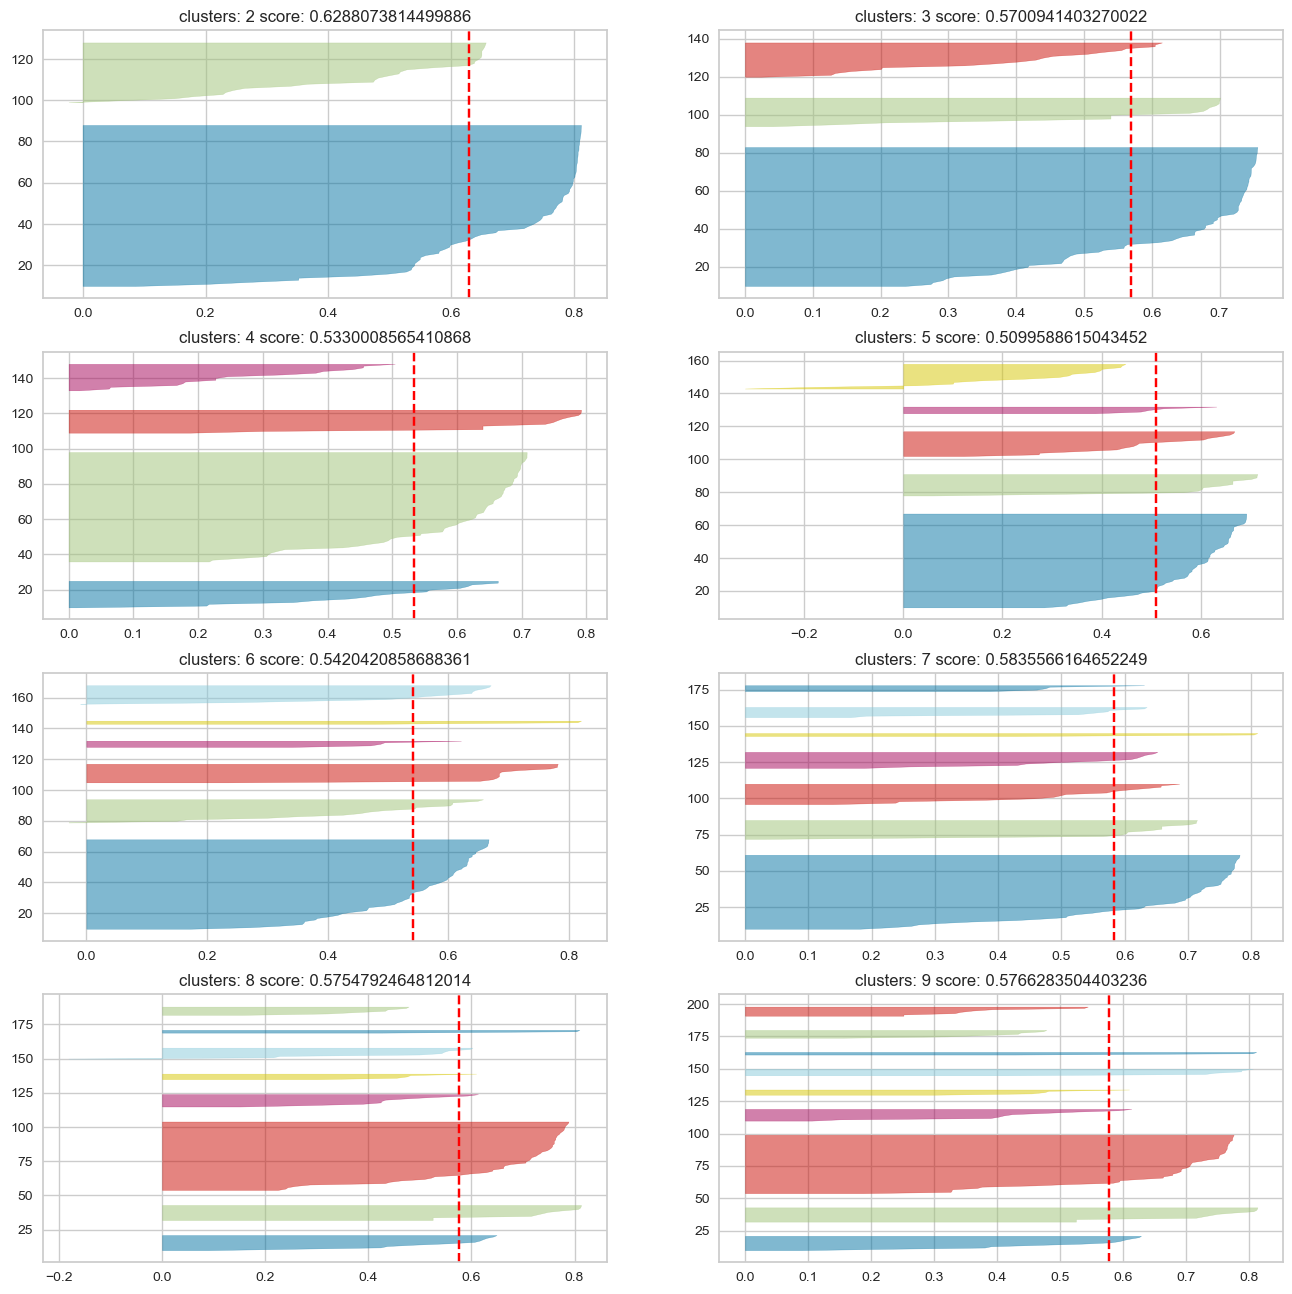

In [95]:
plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
best_kmeans = None
best_score = -1
for n_clusters in range(2, 10):
    plt.subplot(4, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(distcoor_scaled)
    scores[n_clusters] = visualizer.silhouette_score_
    if visualizer.silhouette_score_ > best_score:
        best_score = visualizer.silhouette_score_
        best_kmeans = kmeans
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

We can sort the scores of the above in ascending order.

In [96]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.6288073814499886),
 (7, 0.5835566164652249),
 (9, 0.5766283504403236),
 (8, 0.5754792464812014),
 (3, 0.5700941403270022),
 (6, 0.5420420858688361),
 (4, 0.5330008565410868),
 (5, 0.5099588615043452)]

The Elbow method is used to choose the optimal number of clusters. As shown in the plot below the optimal clusters are the 8, which is close to 12 clusters as the authors choose.

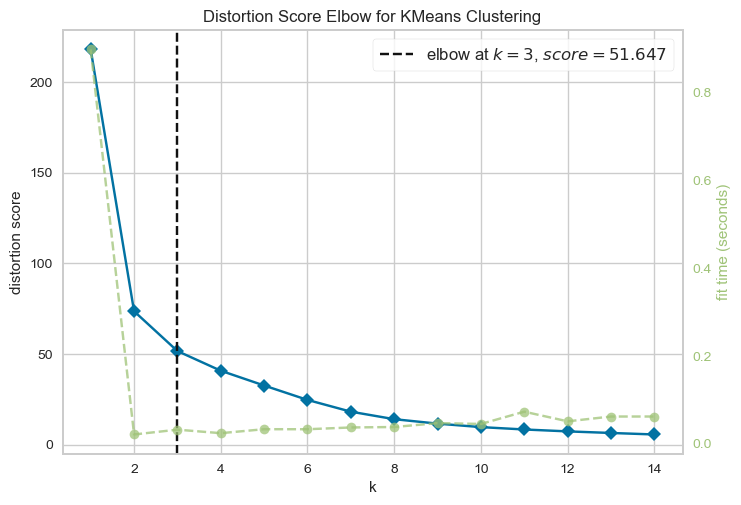

In [97]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,15))

visualizer.fit(distcoor_scaled)
visualizer.show()

Initially, we run k-means for 3 clusters.

In [98]:
kmeans3 = KMeans(n_clusters=3, random_state=0)

After running the k-means, it should be fitted with our scaled data.

In [99]:
kmeans3.fit(distcoor_scaled)

KMeans(n_clusters=3, random_state=0)

We can implement PCA with 3 components equal to the selected clusters.

In [100]:
pca3 = PCA(n_components=2)
X3 = pca3.fit_transform(distcoor_scaled)

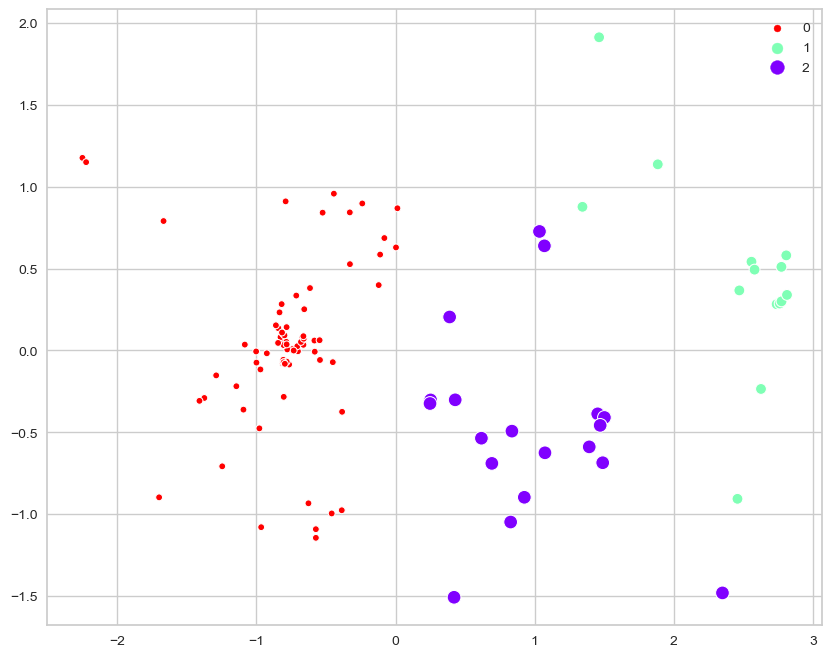

In [101]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X3[:, 0], y=X3[:,1], hue=kmeans3.labels_ , palette="rainbow_r", size=kmeans3.labels_ )

In [102]:
cluster_pred_3= kmeans3.fit_predict(distcoor_scaled)
cluster_pred_3

array([2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2])

Create a new dataset similar to the initial scotch_new and add the column with the 'CLUSTER' each distillery belongs.

In [103]:
list_cluster_3 = cluster_pred_3.tolist()

distcoor_final=scotch_new.copy()

distcoor_final["CLUSTER"] = list_cluster_3
distcoor_final

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,islay,midland,spey,east,west,north,lowland,campbell,islands,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [104]:
distillery_score = distcoor_final[['SCORE','CLUSTER']]
distillery_score

,SCORE,CLUSTER
NAME,,
Aberfeldy,69.0,2
Aberlour,83.0,0
Ardberg,85.0,1
Ardmore,66.0,0
Auchentoshan,85.0,2
...,...,...
Tobermory,67.0,1
Tomatin,75.0,0
Tomintoul,76.0,0


### Cluster 1

In [105]:
distcoor_final[distcoor_final['CLUSTER']== 0]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,islay,midland,spey,east,west,north,lowland,campbell,islands,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Aultmore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Balblair,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
Balmenach,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tamnavulin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Teaninich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Describe the categorical attributes of the first cluster.

In [106]:
dist_cluster_1 = distcoor_final.loc[distcoor_final['CLUSTER']==0, ('AGE','SCORE','percentage')]
dist_cluster_1.mean()

AGE           10.256757
SCORE         75.270270
percentage    40.808108
dtype: float64

In [107]:
dist_cluster_1 = distillery_score.loc[distcoor_final['CLUSTER']==0]
print(dist_cluster_1)

            SCORE  CLUSTER
NAME                      
Aberlour     83.0        0
Ardmore      66.0        0
Aultmore     75.0        0
Balblair     76.0        0
Balmenach    69.0        0
...           ...      ...
Tamnavulin   76.0        0
Teaninich    71.0        0
Tomatin      75.0        0
Tomintoul    76.0        0
Tormore      76.0        0

[74 rows x 2 columns]


In [108]:
dist_high_score_1 = dist_cluster_1['SCORE'].max()
dist_high_score_1

90.0

The 1st Cluster contains 74 scotch whiskeys.

* The average SCORE is equal to 75.2, the average age is 10.2 years and the average percentage is equal to 40.8%.

* The best scotch whiskey is the with SCORE 90.0

### Cluster 2

In [109]:
distcoor_final[distcoor_final['CLUSTER']== 1]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,islay,midland,spey,east,west,north,lowland,campbell,islands,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Bowmore,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Bruichladdich,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Bunnahabhain,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Caol Ila,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Glen Scotia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
Jura,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
Ladyburn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
Lagavulin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Describe the categorical attributes of the second cluster.

In [110]:
dist_cluster_2 = distcoor_final.loc[distcoor_final['CLUSTER']==1, ('AGE','SCORE','percentage')]
dist_cluster_2.mean()

AGE           11.4375
SCORE         79.6250
percentage    42.0500
dtype: float64

In [111]:
dist_cluster_2 = distillery_score.loc[distcoor_final['CLUSTER']==1]
print(dist_cluster_2)

                    SCORE  CLUSTER
NAME                              
Ardberg              85.0        1
Bowmore              81.0        1
Bruichladdich        76.0        1
Bunnahabhain         77.0        1
Caol Ila             77.0        1
Glen Scotia          85.0        1
Jura                 71.0        1
Ladyburn             57.0        1
Lagavulin            89.0        1
Laphroaig            86.0        1
Oban                 76.0        1
Port Ellen           79.0        1
Springbank           88.0        1
Springbank-Longrow   90.0        1
Talisker             90.0        1
Tobermory            67.0        1


In [112]:
dist_high_score_2 = dist_cluster_2['SCORE'].max()
dist_high_score_2

90.0

The 2nd Cluster contains 16 scotch whiskeys.

* The average SCORE is equal to 79.6, the average age is 11.4 years and the average percentage is equal to 42.0%.

* The best scotch whiskey is the Springbank-Longrow with SCORE 90.0

### Cluster 3

In [113]:
distcoor_final[distcoor_final['CLUSTER']== 2]

,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,...,islay,midland,spey,east,west,north,lowland,campbell,islands,CLUSTER
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
Ben Nevis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
Bladnoch,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
Blair Athol,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Dalwhinnie,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Deanston,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Edradour,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Glengoyne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


Describe the categorical attributes of the third cluster.

In [114]:
dist_cluster_3 = distcoor_final.loc[distcoor_final['CLUSTER']==2, ('AGE','SCORE','percentage')]
dist_cluster_3.mean()

AGE           10.473684
SCORE         73.421053
percentage    41.689474
dtype: float64

In [115]:
dist_cluster_3 = distillery_score.loc[distcoor_final['CLUSTER']==2]
print(dist_cluster_3)

                 SCORE  CLUSTER
NAME                           
Aberfeldy         69.0        2
Auchentoshan      85.0        2
Ben Nevis         55.0        2
Bladnoch          85.0        2
Blair Athol       75.0        2
Dalwhinnie        76.0        2
Deanston          69.0        2
Edradour          81.0        2
Glengoyne         74.0        2
Glenkinchie       76.0        2
Glenlochy         70.0        2
Glenturret        77.0        2
Inchmurrin        65.0        2
Inverleven        67.0        2
Kinclaith         69.0        2
Littlemill        83.0        2
Rosebank          76.0        2
Saint Magdalene   67.0        2
Tullibardine      76.0        2


In [116]:
dist_high_score_3 = dist_cluster_3['SCORE'].max()
dist_high_score_3

85.0

The 3rd Cluster contains 19 scotch whiskeys.

* The average SCORE is equal to 73.4, the average age is 10.4 years and the average percentage is equal to 41.6%.

* The best scotch whiskey is the Auchentoshan with SCORE 85.0

Observing the results from Questions 3 and 4, we can conclude that we do not have the same optimal clusters. The clusters are very differents from the onew of author's.